# SPRINT 3.  MARKETING


## 1. IMPORTACIÓN BBDD I CREACIÓN DEL DF

In [8]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.
Taula 'BANK_marketing131024' carregada correctament.
Taula 'BANK_marketing211024' carregada correctament.
Taula 'BANK_marketing_backup_211024' carregada correctament.


In [9]:
df_marketing=df['BANK_marketing211024']

df_marketing=df_marketing.drop(['housing','default','loan','job','marital','education'],axis=1)
df_marketing.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26163 entries, 0 to 26162
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        26163 non-null  int64 
 1   age       26163 non-null  int64 
 2   balance   26163 non-null  int64 
 3   contact   26163 non-null  object
 4   day       26163 non-null  int64 
 5   month     26163 non-null  object
 6   duration  26163 non-null  int64 
 7   campaign  26163 non-null  int64 
 8   pdays     26163 non-null  int64 
 9   previous  26163 non-null  int64 
 10  poutcome  26163 non-null  object
 11  deposit   26163 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 2.4+ MB


## 1.1 Parametros globales de visualización matplotlib seaborn

In [10]:
plt.style.use("seaborn-v0_8-deep")

# Configuración de parámetros globales para Matplotlib
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'figure.figsize': (12, 6),
    'figure.dpi': 100,
    'legend.loc': 'upper right'
})

# Configuración de estilo y contexto de Seaborn
#sns.set(style="whitegrid")  # Estilo del gráfico
sns.set_context("notebook", font_scale=1.2, rc={
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "legend.title_fontsize": 12 
})


## 2. EDA

In [11]:
df_marketing.head()

,id,age,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,2343,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59,2343,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56,45,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41,1270,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55,2476,unknown,5,may,579,1,-1,0,unknown,1


In [14]:
filtro=df_marketing['pdays']!=-1


Text(0.5, 0, 'Dias entre llamadas')

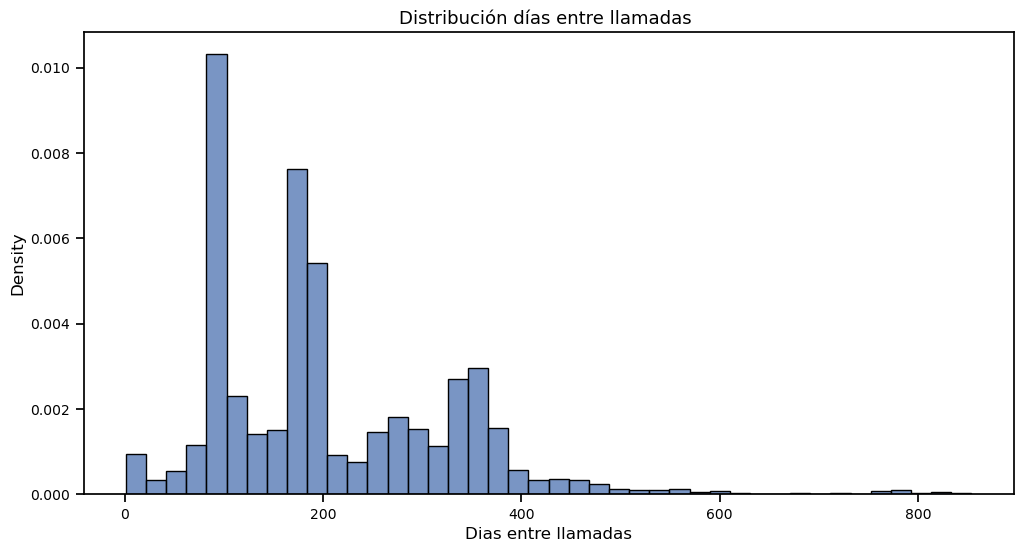

In [15]:
#Ahora a generar una matriz de 2x2 subplots, se accede a cada uno por axs[i,j]
#fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#Utilizar displot no permite utilizar subplot. Bueno recordarlo.
#sns.displot(data=df_marketing,x="duration", kde=False, ax=axs[0], stat='density')
# Graficamos el histograma con seaborn displot
axs=sns.histplot(data=df_marketing[filtro], x="pdays", kde=False,  stat='density')
axs.set_title('Distribución días entre llamadas ')
axs.set_xlabel('Dias entre llamadas')
#axs.set_xlim(0, 450)
#axs.set_ylim(0, 0.02)


Text(0.5, 0, 'Dias entre llamadas')

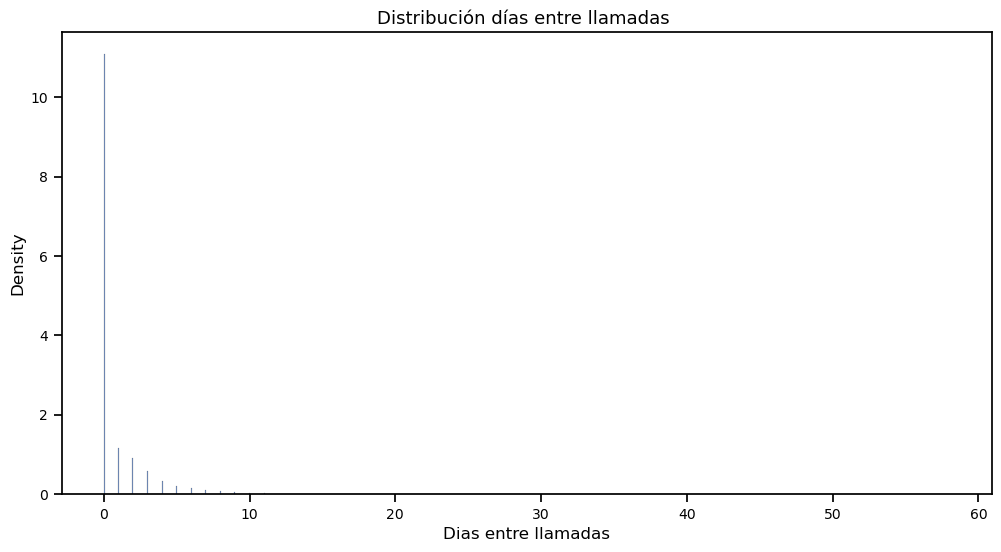

In [16]:
axs=sns.histplot(data=df_marketing, x="previous", kde=False,  stat='density')
axs.set_title('Distribución días entre llamadas ')
axs.set_xlabel('Dias entre llamadas')
#axs.set_xlim(0, 450)
#axs.set_ylim(0, 0.02)


## 3. ANÁLISIS 

### 3.1 Funciones

In [17]:
def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR

    min_Q_ext=Q1 - 3*IQR
    max_Q_ext=Q3 + 3*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext

def clasification_variable_x_cuartiles(valor):
    
    if  valor < min_Q_ext:
        return ("extremo-muy-bajo inf a "+str(round(min_Q_ext,0))) 
    elif valor < min_Q:
        return ("muy-bajo "+str(round(min_Q_ext,0))+" a "+str(round(min_Q,0)))
    elif valor < Q1:
        return ("bajo "+str(round(min_Q,0))+" a "+str(round(Q1,0)))
    elif valor < Q2:
        return ("medio-bajo "+str(round(Q1,0))+" a "+str(round(Q2,0)))
    elif valor < Q3:
        return ("medio-alto "+str(round(Q2,0))+" a "+str(round(Q3,0)))
    elif valor < max_Q:
        return ("alto "+str(round(Q3,0))+" a "+str(round(max_Q,0)))
    elif valor < max_Q_ext:
        return ("muy-alto "+str(round(max_Q,0))+" a "+str(round(max_Q_ext,0)))
    else:
        return ("extremo-muy-alto "+str(round(max_Q_ext,0))+" a inf")



In [18]:
def num_semana_mes (day):

    semana_mes=-1

    if (day>=1 and day <=7):
        semana_mes=1
    elif (day>7 and day <=15):
        semana_mes=2
    elif (day>15 and day <=23):
        semana_mes=3
    elif (day>23 and day <=31):
        semana_mes=4
    else:
        semana_mes=0
    return semana_mes

df_marketing["semana_mes"]=df_marketing["day"].apply(num_semana_mes)




In [19]:
def cuartil_33_y_66(df):
    #calcular cuartiles
    Q33 = df.quantile(0.33)
    Q66 = df.quantile(0.66)
       
    return Q33, Q66

def clasificacion_variable_x_cuartil_33_y_66(valor):
    
    if  valor  <Q33:
        return ("bajo infer a "+str(round(Q33,0))) 
    elif valor <Q66:
        return ("medio "+str(round(Q33,0))+" a "+str(round(Q66,0)))
    else:
        return ("alto super a "+str(round(Q66,0)))

Creación de nuevas variables en el dataset

In [20]:
df_marketing["duration_min"]=round(df_marketing["duration"]/60,2)

Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_marketing['duration_min'])

Q1=round(Q1,1)
Q2=round(Q2,1)
Q3=round(Q3,1)
min_Q=round(min_Q,1)
min_Q_ext=round(min_Q_ext,1)
max_Q=round(max_Q,1)
max_Q_ext=round(max_Q_ext,1)
df_marketing["rango_duration"] = df_marketing["duration_min"].apply(clasification_variable_x_cuartiles)


In [21]:
df_marketing["rango_duration"].value_counts()

rango_duration
medio-alto 4.0 a 8.0           6729
medio-bajo 2.0 a 4.0           6464
bajo -7.0 a 2.0                6442
alto 8.0 a 17.0                5025
muy-alto 17.0 a 26.0           1258
extremo-muy-alto 26.0 a inf     245
Name: count, dtype: int64

In [22]:
Q33, Q66 = cuartil_33_y_66(df_marketing['age'])
df_marketing["categoria_age"] = df_marketing["age"].apply(clasificacion_variable_x_cuartil_33_y_66)
Q33, Q66 = cuartil_33_y_66(df_marketing['balance'])
df_marketing["categoria_balance"] = df_marketing["balance"].apply(clasificacion_variable_x_cuartil_33_y_66)



In [23]:
df_marketing["categoria_age"].value_counts()

categoria_age
alto super a 45.0    9109
medio 34.0 a 45.0    8980
bajo infer a 34.0    8074
Name: count, dtype: int64

In [24]:
Q33, Q66 = cuartil_33_y_66(df_marketing['previous'])
Q33, Q66 

(0.0, 0.0)

In [25]:
df_marketing["categoria_balance"].value_counts()

categoria_balance
alto super a 1114.0     8896
medio 231.0 a 1114.0    8639
bajo infer a 231.0      8628
Name: count, dtype: int64

In [26]:
df_marketing["campaign"].value_counts()

campaign
1     11224
2      7169
3      3098
4      1812
5       861
6       592
7       307
8       291
9       179
10      114
11       98
13       80
12       71
14       38
17       36
15       29
18       22
16       22
21       16
20       13
19       13
30       12
22       10
26       10
25        8
24        7
23        6
32        5
29        5
63        4
33        3
28        2
41        2
43        2
27        1
31        1
Name: count, dtype: int64

In [27]:
df_marketing["semana_mes"].value_counts()

semana_mes
3    7667
2    7353
1    5795
4    5348
Name: count, dtype: int64

In [28]:
df_marketing["previous"].value_counts()

previous
0     19525
1      2070
2      1607
3      1027
4       579
5       380
6       288
7       176
8       151
9        78
10       66
11       56
12       30
17       25
13       21
15       12
19       11
14       10
20        7
23        6
27        4
26        4
22        4
16        4
21        3
30        3
40        3
28        2
18        2
58        2
41        2
55        2
29        2
37        1
Name: count, dtype: int64

In [29]:
#filtro_year = df_marketing['year'].isin(["2008", "2009", "2010"])
df_groupby_semana_mes_tasa_conv = df_marketing.groupby(["semana_mes"])["deposit"].agg(['mean','count'])
df_groupby_semana_mes_tasa_conv=df_groupby_semana_mes_tasa_conv.reset_index()
df_groupby_semana_mes_tasa_conv=df_groupby_semana_mes_tasa_conv.rename(columns={"mean":"tasa_conversion","count":"num_registros"})
df_groupby_semana_mes_tasa_conv

,semana_mes,tasa_conversion,num_registros
0,1,0.503365,5795
1,2,0.511220,7353
2,3,0.430807,7667
3,4,0.450823,5348


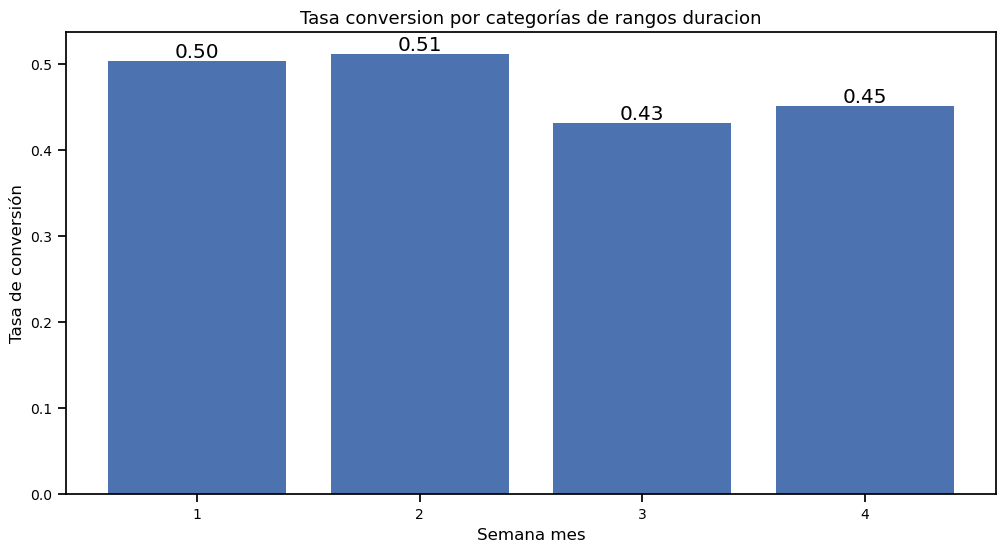

In [30]:
fig, ax = plt.subplots()
bars=ax.bar(df_groupby_semana_mes_tasa_conv ['semana_mes'],df_groupby_semana_mes_tasa_conv ['tasa_conversion'])
# Añadir títulos y etiquetas
#plt.xticks(rotation=45)
plt.title("Tasa conversion por categorías de rangos duracion")
plt.xlabel("Semana mes")
plt.ylabel("Tasa de conversión")
ax.set_xticks([1,2,3,4])

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

# Mostrar gráfico
plt.show()

Graficar el número de semana per rangos de duración sin outliers, extremo-muy-alto y muy-alto en duraciones

In [31]:
is_rango_duration_extremo_alto=df_marketing["rango_duration"]=="extremo-muy-alto 26.0 a inf"
is_rango_duration_muy_alto=df_marketing["rango_duration"]=="muy-alto 17.0 a 26.0"

fitro_duracion_no_extremo_alto_ni_muy_alto= ~((is_rango_duration_extremo_alto | is_rango_duration_muy_alto))


df_groupby_rango_duration_semana_mes=df_marketing[fitro_duracion_no_extremo_alto_ni_muy_alto].groupby(["rango_duration","semana_mes"])["deposit"].agg(['mean','count'])
df_groupby_rango_duration_semana_mes=df_groupby_rango_duration_semana_mes.reset_index()
df_groupby_rango_duration_semana_mes=df_groupby_rango_duration_semana_mes.rename(columns={'mean':'tasa_conversión','count':'num_total_registros'})


In [32]:
df_marketing["rango_duration"].value_counts()

rango_duration
medio-alto 4.0 a 8.0           6729
medio-bajo 2.0 a 4.0           6464
bajo -7.0 a 2.0                6442
alto 8.0 a 17.0                5025
muy-alto 17.0 a 26.0           1258
extremo-muy-alto 26.0 a inf     245
Name: count, dtype: int64

In [33]:
df_groupby_rango_duration_semana_mes


,rango_duration,semana_mes,tasa_conversión,num_total_registros
0,alto 8.0 a 17.0,1,0.800373,1072
1,alto 8.0 a 17.0,2,0.827632,1491
2,alto 8.0 a 17.0,3,0.783117,1540
3,alto 8.0 a 17.0,4,0.801518,922
4,bajo -7.0 a 2.0,1,0.126378,1179
5,bajo -7.0 a 2.0,2,0.152275,1714
6,bajo -7.0 a 2.0,3,0.083210,2031
7,bajo -7.0 a 2.0,4,0.102108,1518
8,medio-alto 4.0 a 8.0,1,0.579040,1708
9,medio-alto 4.0 a 8.0,2,0.580797,1906


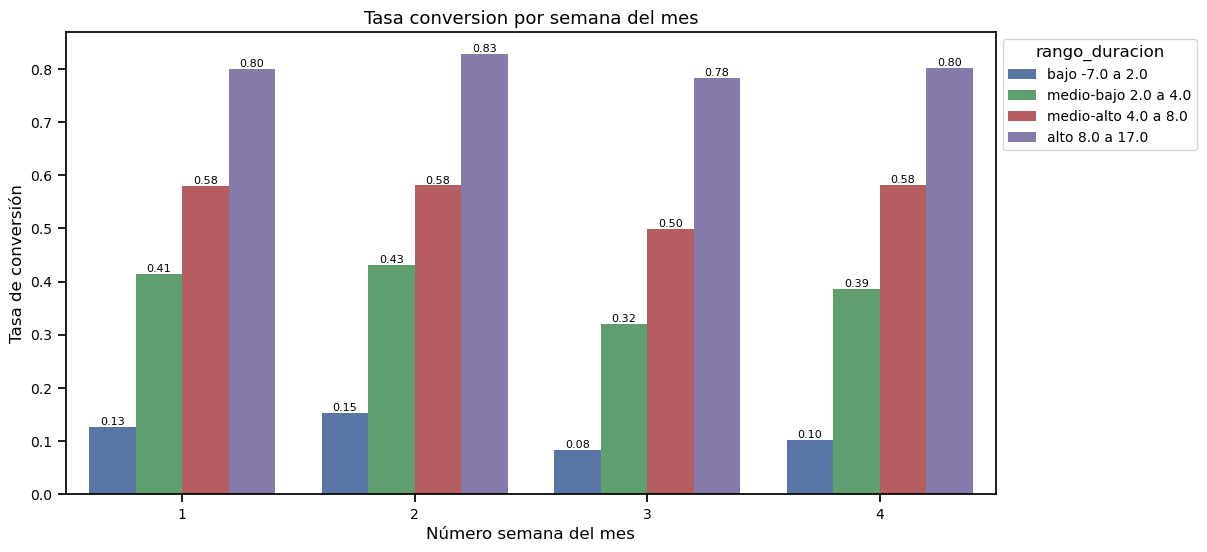

In [34]:
order=[1,2,3,4]
hue_order = [ 'bajo -7.0 a 2.0', 'medio-bajo 2.0 a 4.0','medio-alto 4.0 a 8.0','alto 8.0 a 17.0']
#hue_order=['bajo infer a 34.0','medio 34.0 a 45.0', 'alto super a 45.0']
ax=sns.barplot(x='semana_mes',y='tasa_conversión',data=df_groupby_rango_duration_semana_mes,hue='rango_duration', order=order,hue_order=hue_order)

#plt.xticks(rotation=90,fontsize=10)
plt.title("Tasa conversion por semana del mes")
plt.xlabel("Número semana del mes")
plt.ylabel("Tasa de conversión")


# Añadir los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge',fontsize=8)
    
# Obtener los handles y labels de la leyenda original
handles, labels = ax.get_legend_handles_labels()

# Crear nueva leyenda con etiquetas mapeadas
#new_labels = [label_map[label] for label in labels]
ax.legend(handles=handles, title='rango_duracion', loc='upper left',bbox_to_anchor=(1, 1))

# Mostrar gráfico
plt.show()

In [35]:
df_marketing["rango_duration"].value_counts()

rango_duration
medio-alto 4.0 a 8.0           6729
medio-bajo 2.0 a 4.0           6464
bajo -7.0 a 2.0                6442
alto 8.0 a 17.0                5025
muy-alto 17.0 a 26.0           1258
extremo-muy-alto 26.0 a inf     245
Name: count, dtype: int64

In [36]:
is_rango_duration_medio_bajo=df_marketing["rango_duration"]=="medio-bajo 2.0 a 4.0"
is_rango_duration_medio_alto=df_marketing["rango_duration"]=="medio-alto 4.0 a 8.0"
is_rango_duration_alto=df_marketing["rango_duration"]=="alto 8.0 a 17.0 "

fitro_duracion_medio_bajo_medio_alto_alto= (is_rango_duration_medio_bajo & is_rango_duration_medio_alto & is_rango_duration_alto)


df_groupby_rango_duration_semana_mes=df_marketing[fitro_duracion_medio_bajo_medio_alto_alto].groupby(["categoria_balance","semana_mes"])["deposit"].agg(['mean','count'])
df_groupby_rango_duration_semana_mes=df_groupby_rango_duration_semana_mes.reset_index()
df_groupby_rango_duration_semana_mes=df_groupby_rango_duration_semana_mes.rename(columns={'mean':'tasa_conversión','count':'num_total_registros'})
